# Decision Tree Algorithm
### By Ogi Moore

## Example Dataset

[Backorder prediction dataset][1] - https://www.kaggle.com/tiredgeek/predict-bo-trial

Dataset Variables:

* 1 - Unique Identifier for each part:
* 16 - Continuous variables (forcast, sales, etc)
* 5 - Binary flags relating
* Output - Went on backorder (target value)


[1]: <https://www.kaggle.com/tiredgeek/predict-bo-trial> "Backorder prediction"

## Changes

Removed binary flags parameters due to mixture of continuous and categorical values, was not sure how to handle that, and when doing a first principles implementation, wasn't sure I could figure it out in due time.

## Criminally Simple Exploratory Data Analysis

In [1]:
import pandas as pd

training_data = './data/Kaggle_Training_Dataset_v2.csv'
test_data = './data/Kaggle_Test_Dataset_v2.csv'

train_df = (pd.read_csv(training_data, 
                        index_col=0, 
                       engine='c', 
                       dtype={'sku': str})
            .fillna(value=0))
            

test_df = (pd.read_csv(test_data, 
                       index_col=0, 
                       engine='c', 
                       dtype={'sku': str})
           .fillna(value=0))

cols_to_drop = ['potential_issue', 
                         'deck_risk', 
                         'stop_auto_buy', 
                         'rev_stop', 
                         'oe_constraint', 
                         'ppap_risk', 
                         'went_on_backorder']

X_train = train_df.drop(cols_to_drop, axis=1)
Y_train = train_df[['went_on_backorder']].replace(['Yes', 'No'], [1, 0])

X_test = test_df.drop(cols_to_drop, axis=1)
Y_test = test_df[['went_on_backorder']].replace(['Yes', 'No'], [1, 0])

In [2]:
X_train.head(10)

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
sku,,,,,,,,,,,,,,,
1026827,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-99.00,-99.00,0.0
1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.99,0.99,0.0
1043696,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-99.00,-99.00,0.0
1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.10,0.13,0.0
1044048,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,-99.00,-99.00,0.0
1044198,13.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.82,0.87,0.0
1044643,1095.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,-99.00,-99.00,0.0
1045098,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0
1045815,140.0,0.0,0.0,15.0,114.0,152.0,0.0,0.0,0.0,0.0,0.0,0.0,-99.00,-99.00,0.0


In [3]:
print(f'Training Samples:\t {X_train.shape[0]}')
print(f'Test Samples:\t\t {X_test.shape[0]}')

print('\n')
print('Distribution of outcomes')
Y_train['went_on_backorder'].value_counts()

Training Samples:	 1687861
Test Samples:		 242076


Distribution of outcomes


0    1676568
1      11293
Name: went_on_backorder, dtype: int64

## Premade Library Usage

### scikit-learn is the most amazing library ever ...let me show you why

* Scikit-Learn is the largest machine-learning library in python
* Their documentation is incredibly useful **even if not using the library**
* Their methods are generally very fast

http://scikit-learn.org/stable/modules/tree.html

In [4]:
from sklearn import tree
from timeit import default_timer as timer

start_time = timer()
classifier = tree.DecisionTreeClassifier()
classifier.fit(X_train.values, Y_train.values)
finish_time = timer()

print(f'Classification Training took {(finish_time - start_time):{4}.{3}} seconds')

Classification Training took 15.9 seconds


## Evaluation

In [5]:
score = classifier.score(X_test.values, Y_test.values)
print(f'Classification score: {score:{5}.{3}}')

Classification score: 0.987


In [6]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix')
confusion_matrix(Y_test.values, 
                 classifier.predict(X_test.values))

Confusion Matrix


array([[238620,    768],
       [  2446,    242]])

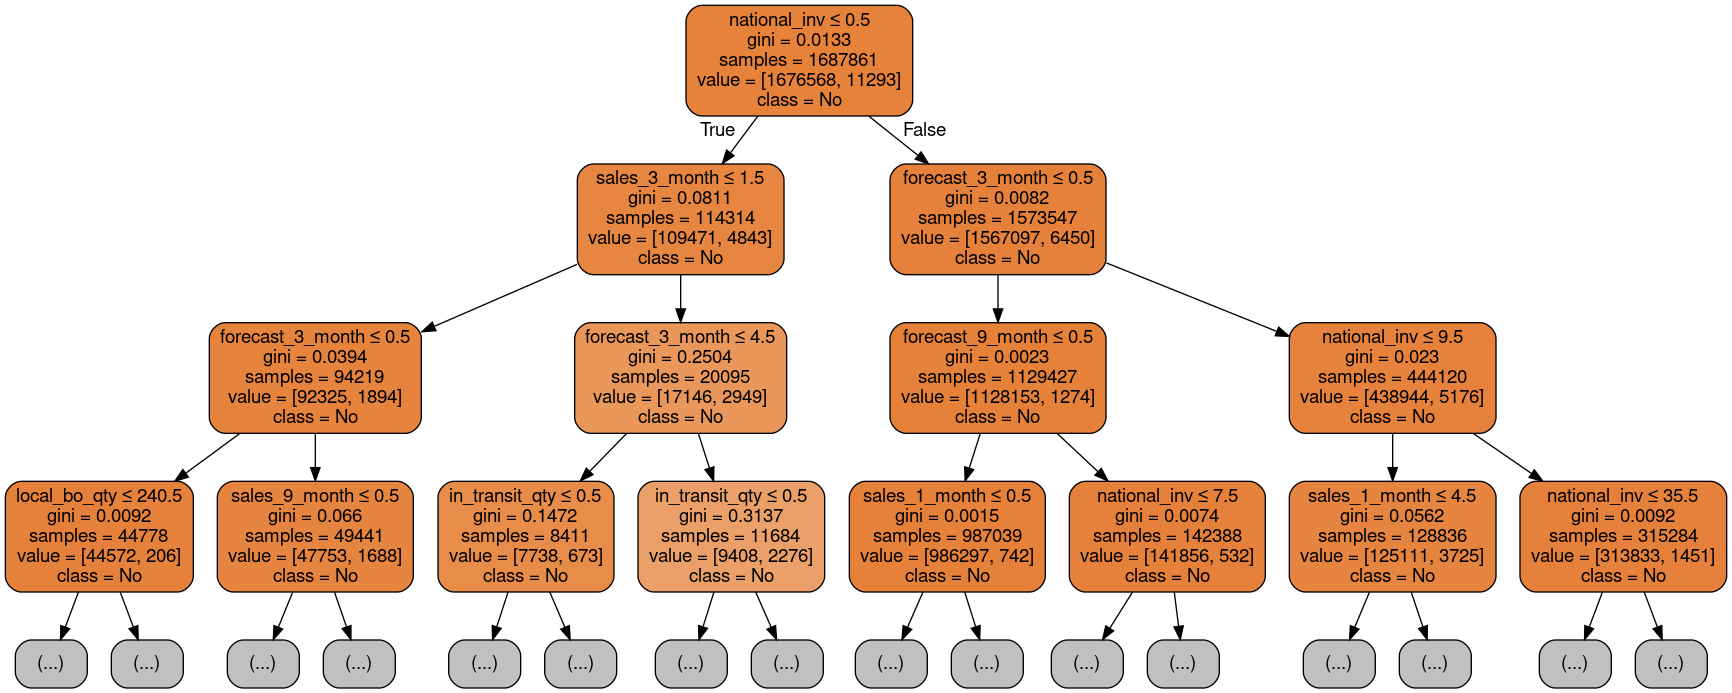

In [7]:
from IPython.display import Image
import pydotplus
dot_data = tree.export_graphviz(classifier, 
                                out_file=None,
                                max_depth=3,
                                feature_names=X_train.columns.values,
                                class_names=['No', 'Yes'],
                                filled=True,
                                rounded=True,
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## My Implementation

In [8]:
import numpy as np

def calc_proportion(group, value):
    proportion = np.sum(group[:, -1] == value) / group.shape[0]
    assert proportion <= 1 and proportion >= 0
    return proportion

def gini_index(groups, class_values):
    proportion = 0
    for class_value in class_values:
        for group in groups:
            if group.shape[0] == 0:
                continue
            p_i = calc_proportion(group, class_value)
            proportion += p_i * (1 - p_i) # typo in the lecture slides?
    gini = 1 - proportion
    assert gini >= 0
    return gini

# partitions the input into left and right regions
def test_partition(col, cutoff, dataset):
    left = dataset[dataset[:, col] < cutoff]
    right = dataset[dataset[:, col] >= cutoff]
    return left, right

In [9]:
def get_partition(dataset):
    class_values = np.unique(dataset[:, -1])
    index, cutoff, score, groups_ =  None, None, 1, None
    for col in range(dataset.shape[1] - 1):
        for row in dataset:
            groups = test_partition(col, row[col], dataset)
            gini = gini_index(groups,
                              class_values)
            # If I have a better gini_index, update the parameters
            if gini < score:
                index, cutoff, score, groups_ = col, row[col], gini, groups
    return {'index':index, 
            'cutoff':cutoff, 
            'groups':groups_}

def to_terminal(group):
    unique, counts = np.unique(group[:, -1], return_counts=True)
    return unique[np.argmax(counts)]

In [10]:
def partition(node, max_depth, min_size, depth):
    try:
        left, right = node['groups']
    except TypeError:
        return
    del(node['groups'])
    
    # check for a no-partitions
    if len(left) == 0 or len(right) == 0:
        new = np.vstack((left, right))
        node['left'] = node['right'] = to_terminal(new)
        return

    # check for max depth
    if depth >= max_depth:
        node['left']  = to_terminal(left)
        node['right'] = to_terminal(right)
        return
    
    # process left child
    if len(left) <= min_size:
        node['left'] = to_terminal(left)
    else:
        node['left'] = get_partition(left)
        partition(node['left'], max_depth, min_size, depth+1)
    
    # process right child
    if len(right) <= min_size:
        node['right'] = to_terminal(right)
    else:
        node['right'] = get_partition(right)
        partition(node['right'], max_depth, min_size, depth+1)

In [11]:
def build_tree(train, max_depth, min_size):
    root = get_partition(train)
    partition(root, max_depth, min_size, 1)
    return root

def predict(node, row):
    if row[node['index']] < node['cutoff']:
        if isinstance(node['left'], dict):
            return predict(node['left'], row)
        else:
            return node['left']
    else:
        if isinstance(node['right'], dict):
            return predict(node['right'], row)
        else:
            return node['right']

def decision_tree(train, test, max_depth, min_size):
    tree = build_tree(train, max_depth, min_size)
    return [predict(tree, row) for row in test]

In [12]:
# Taking a smaller sample because my method is slow...
training_size = 5000
test_size = 2000

test_data = np.hstack((X_test.values, 
                       Y_test.values))
training_data = np.hstack((X_train.values, 
                           Y_train.values))

test_data_small = test_data[np.random.choice(test_data.shape[0], 
                                             size=test_size, 
                                             replace=False), :]

training_data_small = training_data[np.random.choice(training_data.shape[0], 
                                                     size=training_size, 
                                                     replace=False), :]

In [13]:
predictions = decision_tree(training_data_small, test_data_small, 3, 5)
sum(predictions)

0.0

## Summary

* My method doesn't predict a signle positive instance (due to short-max depth)
* My method is way way slow (to get a decent runtime had to chop off ~90% of the data)
* Decision Trees may not be the best classification method for this dataset given the sparcity of the back-order samples
* Don't think I could have implemented without web-based help

### Resources

Scikit Learn Docs:
http://scikit-learn.org/stable/modules/tree.html

How to Implement Decision Trees In Pure Python:
http://machinelearningmastery.com/implement-decision-tree-algorithm-scratch-python/

